# Load Data and Read Data

In [98]:
import geopandas as gpd
import pandas as pd

# Read files of stations
tram_stops = gpd.read_file('../../data/raw/external/Transportation/PTV_METRO_TRAM_STOP.shp')
bus_stops = gpd.read_file('../../data/raw/external/Transportation/PTV_REGIONAL_BUS_ROUTE.shp')
train_stops = gpd.read_file('../../data/raw/external/Transportation/PTV_REGIONAL_TRAIN_STATION.shp')

# Read files about postcode in VIC
postcode_areas = gpd.read_file('../../data/raw/external/Postcode/POSTCODE_POLYGON.shp')

# Process Data

In [99]:
# Ensure that all data has the same coordinate system
tram_stops = tram_stops.to_crs(postcode_areas.crs)
bus_stops = bus_stops.to_crs(postcode_areas.crs)
train_stops = train_stops.to_crs(postcode_areas.crs)

# Using the new 'predicate' parameter for spatial joins
tram_postcode = gpd.sjoin(tram_stops, postcode_areas, how="left", predicate="within")
bus_postcode = gpd.sjoin(bus_stops, postcode_areas, how="left", predicate="within")
train_postcode = gpd.sjoin(train_stops, postcode_areas, how="left", predicate="within")

# Calculate the number of stops per postcode
tram_count = tram_postcode.groupby('POSTCODE').size().reset_index(name='tram_count')
bus_count = bus_postcode.groupby('POSTCODE').size().reset_index(name='bus_count')
train_count = train_postcode.groupby('POSTCODE').size().reset_index(name='train_count')

# Merge results
station_counts = tram_count.merge(bus_count, on='POSTCODE', how='outer')
station_counts = station_counts.merge(train_count, on='POSTCODE', how='outer')

# Fill NaN values ​​with 0, indicating that there is no site of the corresponding type
station_counts.fillna(0, inplace=True)

station_counts.head()

,POSTCODE,tram_count,bus_count,train_count
0,3000,96.0,0.0,1.0
1,3002,22.0,0.0,0.0
2,3003,8.0,0.0,1.0
3,3004,30.0,0.0,0.0
4,3006,27.0,0.0,0.0


In [100]:
station_counts['tram_count'] = pd.to_numeric(station_counts['tram_count'], errors='coerce').astype('Int64')
station_counts['bus_count'] = pd.to_numeric(station_counts['bus_count'], errors='coerce').astype('Int64')
station_counts['train_count'] = pd.to_numeric(station_counts['train_count'], errors='coerce').astype('Int64')

# Rename POSTCODE into postcode
station_counts = station_counts.rename(columns={'POSTCODE':'postcode'})

station_counts.to_csv("../../data/landing/Transportation.csv", index=False)

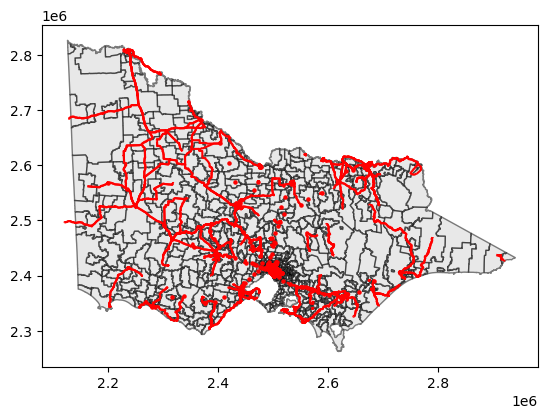

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
postcode_areas.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
tram_stops.plot(ax=ax, color='red', markersize=5)
bus_stops.plot(ax=ax, color='red', markersize=5)
train_stops.plot(ax=ax, color='red', markersize=5)

plt.show()